# HR ANALYTICS WITH VISUALIZATIONS
HR Analytics helps us with interpreting organizational data. It finds the people-related trends in the data and allows the HR Department to take the appropriate steps to keep the organization running smoothly and profitably. Attrition in a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.

#  IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
sns.set_style("darkgrid")

# DATA CLEANING AND PREPARATIONS

In [2]:
hr =pd.read_excel("C:/Users/User/Downloads\EXCEL/HR_DASHBOARD_DESIGN.xlsx", sheet_name= "Data")
hr

,Employee Name,Dept.,Hire Date,Year,Status,Benefits,Compensation,Rating
0,"Page, Lisa",ADC,2005-02-28,2005,Full Time,DMR,60981,2
1,"Taylor, Hector",ADC,2017-04-10,2017,Full Time,DM,60915,1
2,"Dawson, Jonathan",ADC,2013-04-23,2013,Contract,NaN,48536,1
3,"Duran, Brian",ADC,2018-10-18,2018,Contract,NaN,57711,3
4,"Weber, Larry",ADC,2014-02-17,2014,Full Time,M,115547,5
...,...,...,...,...,...,...,...,...
736,"Olsen, Ewan",Research/Development,2013-03-23,2013,Contract,NaN,63477,1
737,"Green, Kim",Research/Development,2006-03-21,2006,Half-Time,DMR,27040,2
738,"Bradshaw, Sheryl",Research/Development,2014-08-28,2014,Contract,NaN,61444,4
739,"Riley, David",Research/Development,2016-09-11,2016,Full Time,DMR,110404,5


In [3]:
hr.shape #741 rows and 8 columns

(741, 8)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee Name  741 non-null    object        
 1   Dept.          741 non-null    object        
 2   Hire Date      741 non-null    datetime64[ns]
 3   Year           741 non-null    int64         
 4   Status         741 non-null    object        
 5   Benefits       494 non-null    object        
 6   Compensation   741 non-null    int64         
 7   Rating         741 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 46.4+ KB


In [5]:
hr.drop("Year", axis = 1, inplace =True)

In [6]:
hr

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating
0,"Page, Lisa",ADC,2005-02-28,Full Time,DMR,60981,2
1,"Taylor, Hector",ADC,2017-04-10,Full Time,DM,60915,1
2,"Dawson, Jonathan",ADC,2013-04-23,Contract,NaN,48536,1
3,"Duran, Brian",ADC,2018-10-18,Contract,NaN,57711,3
4,"Weber, Larry",ADC,2014-02-17,Full Time,M,115547,5
...,...,...,...,...,...,...,...
736,"Olsen, Ewan",Research/Development,2013-03-23,Contract,NaN,63477,1
737,"Green, Kim",Research/Development,2006-03-21,Half-Time,DMR,27040,2
738,"Bradshaw, Sheryl",Research/Development,2014-08-28,Contract,NaN,61444,4
739,"Riley, David",Research/Development,2016-09-11,Full Time,DMR,110404,5


In [7]:
Hire_Year= hr["Hire Date"].dt.year
Hire_Year= Hire_Year.to_frame()
Hire_Year

,Hire Date
0,2005
1,2017
2,2013
3,2018
4,2014
...,...
736,2013
737,2006
738,2014
739,2016


In [8]:
Hire_Year= Hire_Year.rename(columns={"Hire Date": "Hire Year"})

In [9]:
hr= pd.concat([hr, Hire_Year], axis = 1)
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,"Page, Lisa",ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,"Taylor, Hector",ADC,2017-04-10,Full Time,DM,60915,1,2017
2,"Dawson, Jonathan",ADC,2013-04-23,Contract,NaN,48536,1,2013
3,"Duran, Brian",ADC,2018-10-18,Contract,NaN,57711,3,2018
4,"Weber, Larry",ADC,2014-02-17,Full Time,M,115547,5,2014


In [10]:
hr.isna().sum()

Employee Name      0
Dept.              0
Hire Date          0
Status             0
Benefits         247
Compensation       0
Rating             0
Hire Year          0
dtype: int64

In [11]:
hr["Benefits"].value_counts()

DMR    169
R      135
DM      65
M       62
D       62
DR       1
Name: Benefits, dtype: int64

In [12]:
hr["Benefits"]= hr["Benefits"].fillna("DMR")#replace the null values with the mode

In [13]:
hr.isna().sum()

Employee Name    0
Dept.            0
Hire Date        0
Status           0
Benefits         0
Compensation     0
Rating           0
Hire Year        0
dtype: int64

In [14]:
hr["Employee Name"]= hr["Employee Name"].str.replace(",", "")

In [15]:
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,Page Lisa,ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,Taylor Hector,ADC,2017-04-10,Full Time,DM,60915,1,2017
2,Dawson Jonathan,ADC,2013-04-23,Contract,DMR,48536,1,2013
3,Duran Brian,ADC,2018-10-18,Contract,DMR,57711,3,2018
4,Weber Larry,ADC,2014-02-17,Full Time,M,115547,5,2014


# DATA EXPLORATION

In [16]:
# CALCULATE THE TOTAL SALARY
Total_Salary= hr["Compensation"].sum()
print("The total Salary is {:,}".format(Total_Salary))

The total Salary is 47,928,375


In [17]:
#CALCULATE THE AVERAGE SALARY WITH NUMPY
avg= np.average(hr["Compensation"])
print("The average Salary is {:,}". format(round(avg)))

The average Salary is 64,681


In [18]:
#CALCULATE AVERAGE SALARY
Average_Salary = sum(hr["Compensation"])/len(hr["Compensation"])
print('The Average Salary is {:,}'.format(round(Average_Salary)))

The Average Salary is 64,681


In [19]:
#CALCULATE THE MIN SALARY
Min_Salary = hr["Compensation"].min()
print("The Minimum Salary is {:,}".format(Min_Salary))

The Minimum Salary is 21,001


In [20]:
#CALCULATE THE MAX SALARY
Max_Salary= hr["Compensation"].max()
print("The Maximum Salary is {:,}".format(Max_Salary))

The Maximum Salary is 126,627


In [21]:
#CALCULATE THE TOTAL NO OF STAFF
Total_Staff = hr["Employee Name"].count()
print("The Total no of Staff is {}".format(Total_Staff))

The Total no of Staff is 741


# CALCULATE THE NO OF STAFFS BY EMPLOYMENT TYPE

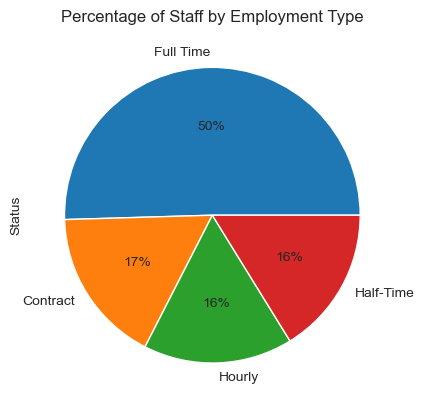

In [22]:
plt.title("Percentage of Staff by Employment Type")
hr["Status"].value_counts().plot(kind="pie", autopct="%1.0f%%");

It is concluded taht half of the employees(50%) works full time.

# CALCULATE THE TOTAL SALARY BY EMPLOYEE TYPE

In [23]:
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,Page Lisa,ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,Taylor Hector,ADC,2017-04-10,Full Time,DM,60915,1,2017
2,Dawson Jonathan,ADC,2013-04-23,Contract,DMR,48536,1,2013
3,Duran Brian,ADC,2018-10-18,Contract,DMR,57711,3,2018
4,Weber Larry,ADC,2014-02-17,Full Time,M,115547,5,2014


In [24]:
status_comp= hr[["Status", "Compensation"]]
status_comp

,Status,Compensation
0,Full Time,60981
1,Full Time,60915
2,Contract,48536
3,Contract,57711
4,Full Time,115547
...,...,...
736,Contract,63477
737,Half-Time,27040
738,Contract,61444
739,Full Time,110404


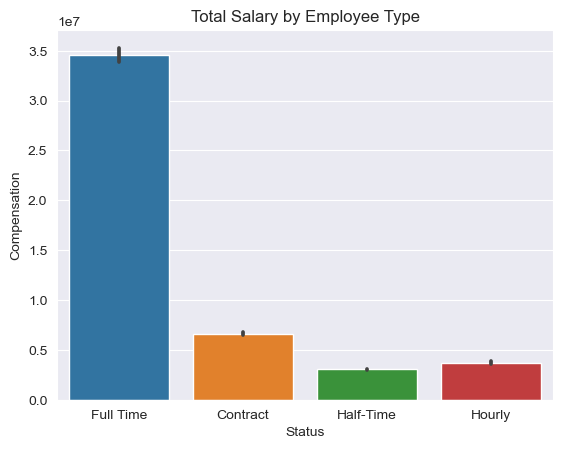

In [25]:
plt.title("Total Salary by Employee Type")
sns.barplot(x=status_comp["Status"], y= status_comp["Compensation"], estimator= np.sum);

The Full TIme employee has the highest total salary of about 34 million

# TOP 10 DEPARTMENT BY NO OF STAFF

In [26]:
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,Page Lisa,ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,Taylor Hector,ADC,2017-04-10,Full Time,DM,60915,1,2017
2,Dawson Jonathan,ADC,2013-04-23,Contract,DMR,48536,1,2013
3,Duran Brian,ADC,2018-10-18,Contract,DMR,57711,3,2018
4,Weber Larry,ADC,2014-02-17,Full Time,M,115547,5,2014


In [27]:
top= hr["Dept."].value_counts().nlargest(10)
top

Manufacturing             151
Quality Control            94
Account Management         88
Quality Assurance          73
Facilities/Engineering     59
Marketing                  51
IT                         44
Product Development        38
Sales                      21
Creative                   19
Name: Dept., dtype: int64

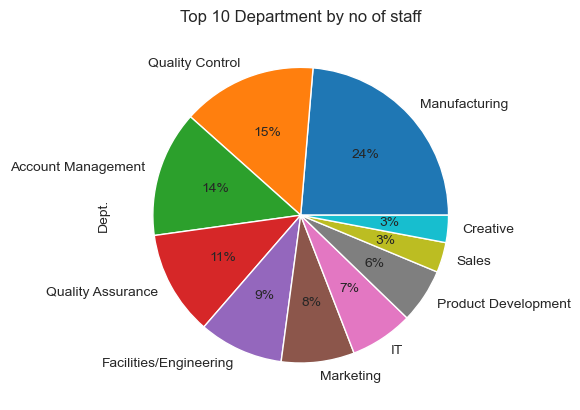

In [28]:
plt.title("Top 10 Department by no of staff")
hr["Dept."].value_counts().nlargest(10).plot(kind= "pie", autopct="%1.0f%%");

# TOP 10 DEPARTMENT BY TOTAL SALARY

In [29]:
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,Page Lisa,ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,Taylor Hector,ADC,2017-04-10,Full Time,DM,60915,1,2017
2,Dawson Jonathan,ADC,2013-04-23,Contract,DMR,48536,1,2013
3,Duran Brian,ADC,2018-10-18,Contract,DMR,57711,3,2018
4,Weber Larry,ADC,2014-02-17,Full Time,M,115547,5,2014


In [30]:
top= hr["Dept."].value_counts().head(10)
top

Manufacturing             151
Quality Control            94
Account Management         88
Quality Assurance          73
Facilities/Engineering     59
Marketing                  51
IT                         44
Product Development        38
Sales                      21
Creative                   19
Name: Dept., dtype: int64

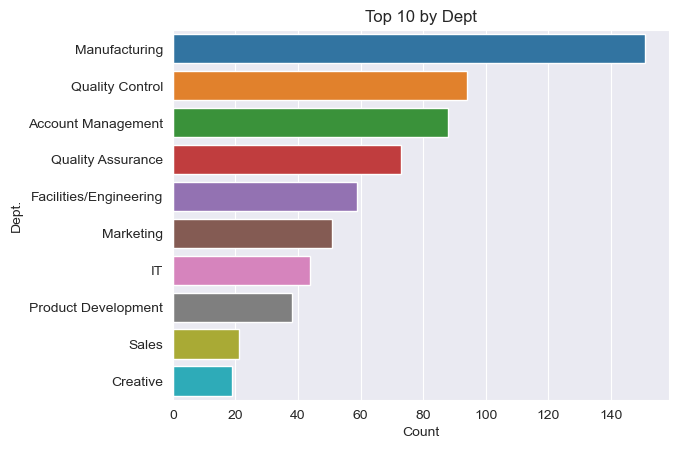

In [31]:
plt.title("Top 10 by Dept")
plt.xlabel("Count")
plt.ylabel("Dept.")
sns.barplot(y=top.index, x= top.values );

Manufacturing Deaprtment has the highest no of staff(151).

# TOP 10 DEPARTMENT BY TOTAL SALARY

In [32]:
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,Page Lisa,ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,Taylor Hector,ADC,2017-04-10,Full Time,DM,60915,1,2017
2,Dawson Jonathan,ADC,2013-04-23,Contract,DMR,48536,1,2013
3,Duran Brian,ADC,2018-10-18,Contract,DMR,57711,3,2018
4,Weber Larry,ADC,2014-02-17,Full Time,M,115547,5,2014


In [33]:
top_dc= hr[["Dept.", "Compensation"]]
top_dc

,Dept.,Compensation
0,ADC,60981
1,ADC,60915
2,ADC,48536
3,ADC,57711
4,ADC,115547
...,...,...
736,Research/Development,63477
737,Research/Development,27040
738,Research/Development,61444
739,Research/Development,110404


In [34]:
top_10 =top_dc.groupby(hr["Dept."]).sum().sort_values("Compensation", ascending= False)
top_10

C:\Users\User\AppData\Local\Temp\ipykernel_1960\851958508.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10 =top_dc.groupby(hr["Dept."]).sum().sort_values("Compensation", ascending= False)


,Compensation
Dept.,
Manufacturing,8952636
Quality Control,5949181
Account Management,5703415
Quality Assurance,4682406
Facilities/Engineering,4014388
Marketing,3651753
IT,3224037
Product Development,2394401
Sales,1392541


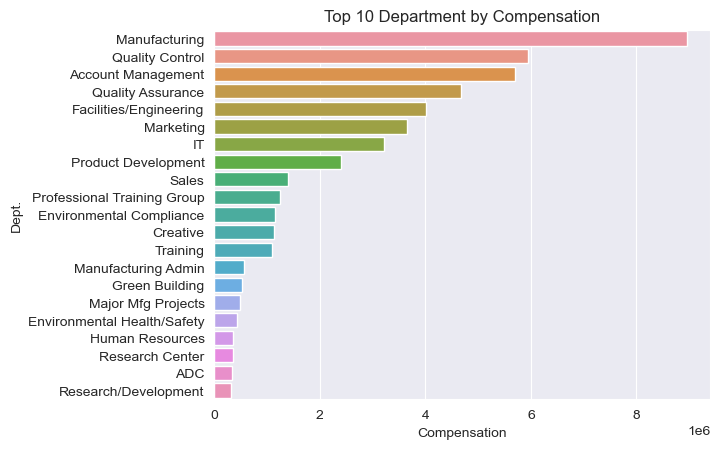

In [35]:
plt.title("Top 10 Department by Compensation")
sns.barplot(y= top_10.index, x= top_10["Compensation"]);

Manufacturing department has the total highest pay employee of over 8million dollars

# NO OF STAFFS HIRED OVER THE YEARS

In [36]:
hr.head()

,Employee Name,Dept.,Hire Date,Status,Benefits,Compensation,Rating,Hire Year
0,Page Lisa,ADC,2005-02-28,Full Time,DMR,60981,2,2005
1,Taylor Hector,ADC,2017-04-10,Full Time,DM,60915,1,2017
2,Dawson Jonathan,ADC,2013-04-23,Contract,DMR,48536,1,2013
3,Duran Brian,ADC,2018-10-18,Contract,DMR,57711,3,2018
4,Weber Larry,ADC,2014-02-17,Full Time,M,115547,5,2014


In [37]:
hr_year= hr["Hire Year"].value_counts().sort_values(ascending= False)
hr_year

2013    92
2016    92
2017    75
2014    72
2005    66
2012    63
2004    63
2018    53
2006    39
2015    30
2007    26
2009    25
2008    20
2010    15
2019     6
2011     4
Name: Hire Year, dtype: int64

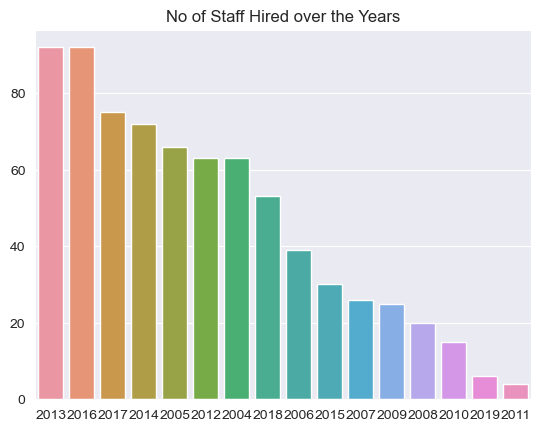

In [38]:
plt.title("No of Staff Hired over the Years")
sns.barplot(x=hr_year.index, y= hr_year.values,order= hr_year.index);

Highest no of staff was highed in the year 2013 and 2016 (92 staffs). The no of staff that was hired in year 2011 was low(4 staffs)

C:\Users\User\AppData\Local\Temp\ipykernel_1960\1396818047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr(), cbar= True, linewidths= 0.5);


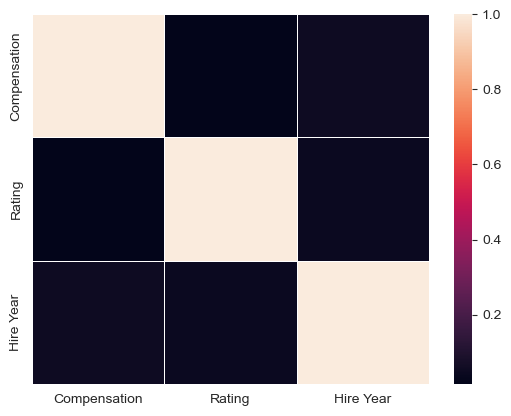

In [39]:
sns.heatmap(hr.corr(), cbar= True, linewidths= 0.5);

# CONCLUSION
From all the analysis above, it can be concluded that:
Half of the employees(50%) works full time.
The Full TIme employee has the highest total salary of about 34 million
Manufacturing department has the total highest pay employee of over 8million dollars
Highest no of staff was highed in the year 2013 and 2016 (92 staffs). The no of staff that was hired in year 2011 was low(4 staffs)